Total number of transitions:        14053
Total number of visited states:     4938
Average value for transition:       4.994083113925945
Maximum value for transition:       5.579999999999988
Minimum value for transition:       2.8600000000000376
Round 1 completed!

Total number of transitions:        28944
Total number of visited states:     9384
Average value for transition:       4.994199315920403
Maximum value for transition:       6.119999999999976
Minimum value for transition:       0.645000000000083
Round 2 completed!

Total number of transitions:        38743
Total number of visited states:     11878
Average value for transition:       4.993466561701401
Maximum value for transition:       6.714999999999963
Minimum value for transition:       -1.5299999999999079
Round 3 completed!

Total number of transitions:        47787
Total number of visited states:     14054
Average value for transition:       4.992918576181721
Maximum value for transition:       7.294999999999951
Minimum v

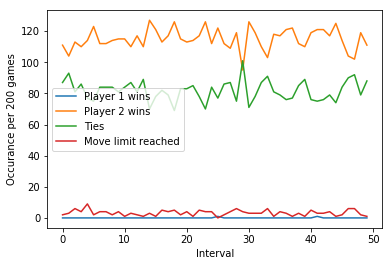

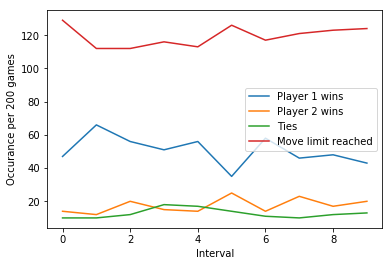

Games Played:                       10000
Player 1 wins:                      2
Player 2 wins:                      5749
Games exceeded move limit:          162
Games tied:                         4087
Total moves made:                   641402
Average moves made:                 64.1402
Max moves made:                     500
Min moves made:                     26

Games Played:                       2000
Player 1 wins:                      506
Player 2 wins:                      174
Games exceeded move limit:          1193
Games tied:                         127
Total moves made:                   762376
Average moves made:                 381.188
Max moves made:                     600
Min moves made:                     32


In [3]:
# NAME: DEEPAK GUPTA
# ROLL NUMBER: 167507
# ASSIGNMENT: REINFORCEMENT LEARNING OF CHECKERS GAME

import random
import json
import copy
from ast import literal_eval
from Board import Board
import matplotlib.pyplot as plt

class Player:
    
    def set_board(self, the_board):
        self.board = the_board
    
    def game_completed(self):
        pass
    
    def get_next_move(self):
        pass

def reward_function(state_info1, state_info2):
    if state_info2[1] == 0 and state_info2[3] == 0:
        return 12
    if state_info2[0] == 0 and state_info2[2] == 0:
        return -12
    return state_info2[0]-state_info1[0] + 2*(state_info2[2]-state_info1[2])-(state_info2[1]-state_info1[1])-2*(state_info2[3]-state_info1[3])


class Q_Learning_AI(Player):


    def __init__(self, the_player_id, the_learning_rate, the_discount_factor, info_location=None, the_random_move_probability=0, the_board=None):
        self.random_move_probability = the_random_move_probability  #May want to rename this
        self.learning_rate = the_learning_rate    
        self.discount_factor = the_discount_factor
        self.player_id = the_player_id
        self.board = the_board
        self.pre_last_move_state = None
        self.post_last_move_state = None 
        if not info_location is None:
            self.load_transition_information(info_location)
        else:
            self.transitions = {}

    def set_random_move_probability(self, probability):
        self.random_move_probability = probability


    def set_learning_rate(self, the_learning_rate):
        self.learning_rate = the_learning_rate
    

    def get_states_from_boards_spots(self, boards_spots):
        piece_counters = [[0,0,0,0,0,0,0] for j in range(len(boards_spots))] 
        #piece_counters = [[0,0,0,0,0,0,0,0,0] for j in range(len(boards_spots))] 
        for k in range(len(boards_spots)):
            for j in range(len(boards_spots[k])):
                for i in range(len(boards_spots[k][j])):
                    if boards_spots[k][j][i] != 0:
                    
                        piece_counters[k][boards_spots[k][j][i]-1] = piece_counters[k][boards_spots[k][j][i]-1] + 1
                        if (self.player_id and (boards_spots[k][j][i] == 1 or boards_spots[k][j][i] == 3)) or (not self.player_id and (boards_spots[k][j][i] == 2 or boards_spots[k][j][i] == 4)):
                            if i==0 and j%2==0:
                                piece_counters[k][4] = piece_counters[k][4] + 1
                            elif i==3 and j%2==1:
                                piece_counters[k][4] = piece_counters[k][4] + 1
                                
                            piece_counters[k][5] = piece_counters[k][5] + j#%%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (2)
                            #piece_counters[k][6] = piece_counters[k][6] + i
                        else: 
                            #piece_counters[k][7] = piece_counters[k][7] + j#%%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (2)
                            #piece_counters[k][8] = piece_counters[k][8] + i
                            piece_counters[k][6] = piece_counters[k][6] + j
            
            
            if piece_counters[k][0] + piece_counters[k][2] != 0: #%%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (2)
                piece_counters[k][5] = int(piece_counters[k][5] / (piece_counters[k][0] + piece_counters[k][2]))
                #piece_counters[k][6] = int(piece_counters[k][6] / (piece_counters[k][0] + piece_counters[k][2]))
            else:
                piece_counters[k][5] = 0
                #piece_counters[k][6] = 0
            if piece_counters[k][1] + piece_counters[k][3] != 0:
                piece_counters[k][6] = int(piece_counters[k][6] / (piece_counters[k][1] + piece_counters[k][3]))
                #piece_counters[k][8] = int(piece_counters[k][8] / (piece_counters[k][1] + piece_counters[k][3]))
            else:
                piece_counters[k][6] = 0
                #piece_counters[k][8] = 0
    
        return [tuple(counter) for counter in piece_counters]
                                 

    def get_desired_transition_between_states(self, possible_state_array, initial_transition_value=5):#%%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (1)
        cur_state = tuple(self.get_states_from_boards_spots([self.board.spots])[0])
        done_transitions = {}
        for state in possible_state_array:#%%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (1)
            if done_transitions.get((cur_state, tuple(state))) is None:
                if self.transitions.get((cur_state, tuple(state))) is None:
                    self.transitions.update({(cur_state, tuple(state)):initial_transition_value})
                done_transitions.update({(cur_state, tuple(state)):self.transitions.get((cur_state, tuple(state)))})
                
            
        if random != 0 and random.random() < self.random_move_probability:
            try:
                return list(done_transitions.keys())[random.randint(0, len(done_transitions)-1)]
            except:   #Make sure that you don't need to specify the exception
                return []
    
        try:
            reverse_dict = {j:i for i,j in done_transitions.items()}
            return reverse_dict.get(max(reverse_dict))
        except:
            return []    
   
   
    def game_completed(self):
        cur_state = self.get_states_from_boards_spots([self.board.spots])[0]
        transition = (self.pre_last_move_state ,self.post_last_move_state)

        self.transitions[transition] = self.transitions[transition] + self.learning_rate * reward_function(transition[0],cur_state)

        self.pre_last_move_state = None
        self.post_last_move_state = None



    def get_transitions_information(self):
        start_of_transitions = {}
        max_value = float("-inf")
        min_value = float("inf")
        total_value = 0
        for k,v in self.transitions.items():
            if start_of_transitions.get(k[0]) is None:
                start_of_transitions.update({k[0]:0})
            #if k[0] not in start_of_transitions:
                #start_of_transitions.append(k[0])
            if v > max_value:
                max_value = v
            if v < min_value:
                min_value = v
            total_value = total_value + v
            
        return [len(self.transitions), len(start_of_transitions), float(total_value/len(self.transitions)), max_value, min_value]
    
    
    def print_transition_information(self, info):
        print("Total number of transitions: ".ljust(35), info[0])        
        print("Total number of visited states: ".ljust(35), info[1])
        print("Average value for transition: ".ljust(35), info[2])
        print("Maximum value for transition: ".ljust(35), info[3])
        print("Minimum value for transition: ".ljust(35), info[4])
    
        
    def save_transition_information(self, file_name="data.json"):
        with open(file_name, 'w') as fp:
            json.dump({str(k): v for k,v in self.transitions.items()}, fp)
        
        
    def load_transition_information(self, file_name):
        with open(file_name, 'r') as fp:
            self.transitions = {literal_eval(k): v for k,v in json.load(fp).items()}
        
        
    def get_optimal_potential_value(self, depth):
        answer = float("-inf")
        cur_state = self.get_states_from_boards_spots([self.board.spots])[0]
        for k,v in self.transitions.items():
            if k > answer and v[0] == cur_state:
                answer = k
        
        if answer == float("-inf"):
            return None
        return answer



    def get_next_move(self):#, new_board):
        if self.pre_last_move_state is not None:#%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (1)
            cur_state = self.get_states_from_boards_spots([self.board.spots])[0]
    
            transition = (self.pre_last_move_state ,self.post_last_move_state)
            try:# self.transitions.get(transition) is not None:#%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (1)
                max_future_state = self.get_optimal_potential_value(1)
                self.transitions[transition] = self.transitions[transition] + self.learning_rate * (reward_function(transition[0],cur_state)+ self.discount_factor* max_future_state - self.transitions[transition])
            except:#%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (1)
                self.transitions[transition] = self.transitions[transition] + self.learning_rate * (reward_function(transition[0],cur_state))
        
        
        self.pre_last_move_state = self.get_states_from_boards_spots([self.board.spots])[0]#%%%%%%%%%%%%%%%%%%%%%%%%%%%% FOR (1)
        
        possible_next_moves = self.board.get_possible_next_moves()
        possible_next_states = self.get_states_from_boards_spots(self.board.get_potential_spots_from_moves(possible_next_moves))
        
        self.post_last_move_state = self.get_desired_transition_between_states(possible_next_states)[1]   
        
        considered_moves = []
        for j in range(len(possible_next_states)):
            if tuple(possible_next_states[j]) == self.post_last_move_state:
                considered_moves.append(possible_next_moves[j])
                
                

        #I believe with the updated board.is_game_over() I don't need to use this try statement 
        try:
            return considered_moves[random.randint(0,len(considered_moves)-1)]
        except ValueError:
            return []
            

def get_number_of_pieces_and_kings(spots, player_id=None):
    piece_counter = [0,0,0,0]  
    for row in spots:
        for element in row:
            if element != 0:
                piece_counter[element-1] = piece_counter[element-1] + 1
    
    if player_id == True:
        return [piece_counter[0], piece_counter[2]]
    elif player_id == False:
        return [piece_counter[1], piece_counter[3]]
    else:
        return piece_counter
    

class Alpha_beta(Player):
    def __init__(self, the_player_id, the_depth, the_board=None):
        self.board = the_board
        self.depth = the_depth
        self.player_id = the_player_id

    def alpha_beta(self, board, depth, alpha, beta, maximizing_player):
        if board.is_game_over():
            if get_number_of_pieces_and_kings(board.spots, board.player_turn) == [0,0]:
                if maximizing_player:
                    return -10000000, None  #Using integers instead of float("inf") so it's less than float("inf") not equal to
                else:
                    return 10000000, None
            elif get_number_of_pieces_and_kings(board.spots, not board.player_turn) == [0,0]:
                if maximizing_player:
                    return 1000000, None
                else:
                    return -1000000, None
            else:
                return 0, None

        if depth == 0:
            players_info = get_number_of_pieces_and_kings(board.spots)
            if board.player_turn != maximizing_player:
                return  players_info[1] + 2 * players_info[3] - (players_info[0] + 2 * players_info[2]), None
            return  players_info[0] + 2 * players_info[2] - (players_info[1] + 2 * players_info[3]), None
        possible_moves = board.get_possible_next_moves()

        potential_spots = board.get_potential_spots_from_moves(possible_moves)
        desired_move_index = None
        if maximizing_player:
            v = float('-inf')
            for j in range(len(potential_spots)):
                cur_board = Board(potential_spots[j], not board.player_turn)
                alpha_beta_results = self.alpha_beta(cur_board, depth - 1, alpha, beta, False)
                if v < alpha_beta_results[0]: 
                    v = alpha_beta_results[0]
                    alpha = max(alpha, v)
                    desired_move_index = j
                if beta <= alpha: 
                    break
            if desired_move_index is None:
                return v, None
            return v, possible_moves[desired_move_index]
        else:
            v = float('inf')
            for j in range(len(potential_spots)):
                cur_board = Board(potential_spots[j], not board.player_turn)
                alpha_beta_results = self.alpha_beta(cur_board, depth - 1, alpha, beta, True)
                if v > alpha_beta_results[0]:  
                    v = alpha_beta_results[0]
                    desired_move_index = j
                    beta = min(beta, v)
                if beta <= alpha:
                    break
            if desired_move_index is None:
                return v, None
            return v, possible_moves[desired_move_index]
    
    def get_next_move(self):
        return self.alpha_beta(self.board, self.depth, float('-inf'), float('inf'), self.player_id)[1]
        

def play_n_games(player1, player2, num_games, move_limit):
    game_board = Board()
    player1.set_board(game_board)
    player2.set_board(game_board)
     
    players_move = player1
    outcome_counter = [[-1,-1,-1,-1,-1,-1] for j in range(num_games)] 
    for j in range(num_games):
        #print(j)
        move_counter = 0
        while not game_board.is_game_over() and move_counter < move_limit:
            game_board.make_move(players_move.get_next_move())
             
            move_counter = move_counter + 1
            if players_move is player1:
                players_move = player2
            else:
                players_move = player1
        else:
            piece_counter = get_number_of_pieces_and_kings(game_board.spots)
            if piece_counter[0] != 0 or piece_counter[2] != 0:
                if piece_counter[1] != 0 or piece_counter[3] != 0:
                    if move_counter == move_limit:
                        outcome_counter[j][0] = 3
                    else:
                        outcome_counter[j][0] = 2
#                     if (j+1)%100==0:
#                         print("Tie game for game #" + str(j + 1) + " in " + str(move_counter) + " turns!")
                else:
                    outcome_counter[j][0] = 0
#                     if (j+1)%100==0:
#                         print("Player 1 won game #" + str(j + 1) + " in " + str(move_counter) + " turns!")
            else:
                outcome_counter[j][0] = 1
#                 if (j+1)%100==0:
#                     print("Player 2 won game #" + str(j + 1) + " in " + str(move_counter) + " turns!")
                
            outcome_counter[j][1] = move_counter
            outcome_counter[j][2] = piece_counter[0]
            outcome_counter[j][3] = piece_counter[1]
            outcome_counter[j][4] = piece_counter[2]
            outcome_counter[j][5] = piece_counter[3]
             
            player1.game_completed()
            player2.game_completed()
            #game_board.print_board()
            game_board.reset_board()
     
    return outcome_counter


def pretty_outcome_display(outcomes):
    game_wins = [0,0,0,0]
    total_moves = 0
    max_moves_made = float("-inf")
    min_moves_made = float("inf")
    for outcome in outcomes:
        total_moves = total_moves + outcome[1]
        if outcome[1] < min_moves_made:
            min_moves_made = outcome[1]
        if outcome[1] > max_moves_made:
            max_moves_made = outcome[1]
        
        game_wins[outcome[0]] = game_wins[outcome[0]] + 1
    
    print("Games Played: ".ljust(35), len(outcomes))
    print("Player 1 wins: ".ljust(35), game_wins[0])
    print("Player 2 wins: ".ljust(35), game_wins[1])
    print("Games exceeded move limit: ".ljust(35), game_wins[3])
    print("Games tied: ".ljust(35), game_wins[2])
    print("Total moves made: ".ljust(35), total_moves)  
    print("Average moves made: ".ljust(35), total_moves/len(outcomes))
    print("Max moves made: ".ljust(35), max_moves_made)
    print("Min moves made: ".ljust(35), min_moves_made)
    

def plot_end_game_information(outcome, interval, title="End of Game Results"):
    """
    """
    player1_wins = [0 for j in range(int(len(outcome)/interval))]
    player2_wins = [0 for j in range(int(len(outcome)/interval))]
    ties = [0 for j in range(int(len(outcome)/interval))]
    move_limit = [0 for j in range(int(len(outcome)/interval))]
    
    for j in range(int(len(outcome)/interval)):
        for i in range(interval):
            if outcome[j*interval + i][0] == 0:
                player1_wins[j] = player1_wins[j] + 1
            elif outcome[j*interval + i][0] == 1:
                player2_wins[j] = player2_wins[j] + 1
            elif outcome[j*interval + i][0] == 2:
                ties[j] = ties[j] + 1
            else:
                move_limit[j] = move_limit[j] + 1
                
    plt.figure(title)
    
    p1_win_graph, = plt.plot(player1_wins, label = "Player 1 wins")
    p2_win_graph, = plt.plot(player2_wins, label = "Player 2 wins")
    tie_graph, = plt.plot(ties, label = "Ties")
    move_limit_graph, = plt.plot(move_limit, label = "Move limit reached")
    
    plt.ylabel("Occurance per " +str(interval) + " games")
    plt.xlabel("Interval")
    
    plt.legend(handles=[p1_win_graph, p2_win_graph, tie_graph, move_limit_graph])




LEARNING_RATE = .005  
DISCOUNT_FACTOR = .3
NUM_GAMES_TO_TRAIN = 1000
NUM_TRAINING_ROUNDS = 10
NUM_VALIDATION_GAMES = 200
NUM_GAMES_TO_TEST = 0
TRAINING_RANDOM_MOVE_PROBABILITY = .25
ALPHA_BETA_DEPTH = 2
TRAINING_MOVE_LIMIT = 500
VALIDATION_MOVE_LIMIT = 600
TESTING_MOVE_LIMIT = 2000
PLAYER1 = Q_Learning_AI(True, LEARNING_RATE, DISCOUNT_FACTOR, the_random_move_probability=TRAINING_RANDOM_MOVE_PROBABILITY)#, info_location="data.json")
PLAYER2 = Alpha_beta(False, ALPHA_BETA_DEPTH)
PLAYER3 = Alpha_beta(False, 1)
PLAYER4 = Alpha_beta(False, 3)



#PLAYER1.print_transition_information(PLAYER1.get_transitions_information())

training_info = []
validation_info = []
for j in range(NUM_TRAINING_ROUNDS):
    training_info.extend(play_n_games(PLAYER1, PLAYER2, NUM_GAMES_TO_TRAIN, TRAINING_MOVE_LIMIT))
    PLAYER1.print_transition_information(PLAYER1.get_transitions_information())
    PLAYER1.set_random_move_probability(0)
    PLAYER1.set_learning_rate(0)
    validation_info.extend(play_n_games(PLAYER1, PLAYER3, NUM_VALIDATION_GAMES, VALIDATION_MOVE_LIMIT))
    print("Round " + str(j+1) + " completed!")
    PLAYER1.set_random_move_probability(TRAINING_RANDOM_MOVE_PROBABILITY)
    PLAYER1.set_learning_rate(LEARNING_RATE)
    #print("")
    #PLAYER1.print_transition_information(PLAYER1.get_transitions_information())
    print("")
    PLAYER1.save_transition_information()

  
plot_end_game_information(training_info, 200, "Training Information")
plot_end_game_information(validation_info, NUM_VALIDATION_GAMES, "Validation Information")
plt.show()

pretty_outcome_display(training_info)
print("")
pretty_outcome_display(validation_info)



In [5]:


import math
import copy
import time
from functools import reduce

class Board:
    EMPTY_SPOT = 0
    P1 = 1
    P2 = 2
    P1_K = 3
    P2_K = 4
    BACKWARDS_PLAYER = P2
    HEIGHT = 8
    WIDTH = 4
    
    
    def __init__(self, old_spots=None, the_player_turn=True):
        self.player_turn = the_player_turn 
        if old_spots is None:   
            self.spots = [[j,j,j,j] for j in [self.P1, self.P1, self.P1, self.EMPTY_SPOT, self.EMPTY_SPOT, self.P2, self.P2, self.P2]]
        else:
            self.spots = old_spots


    def reset_board(self):
        self.spots = Board().spots
        
    
    def empty_board(self):
      self.spots = [[j,j,j,j] for j in [self.EMPTY_SPOT]*self.HEIGHT]  #Make sure [self.EMPTY_SPOT]*self.HEIGHT] has no issues
    
    
    def is_game_over(self):
        if not self.get_possible_next_moves():
            return True
        return False


    def not_spot(self, loc):
        if len(loc) == 0 or loc[0] < 0 or loc[0] > self.HEIGHT-1 or loc[1] < 0 or loc[1] > self.WIDTH-1:
            return True
        return False
    
    
    def get_spot_info(self, loc):
        return self.spots[loc[0]][loc[1]]
    
    
    def forward_n_locations(self, start_loc, n, backwards=False):
        if n % 2 == 0:
            temp1 = 0
            temp2 = 0
        elif start_loc[0] % 2 == 0:
            temp1 = 0
            temp2 = 1 
        else:
            temp1 = 1
            temp2 = 0

        answer = [[start_loc[0], start_loc[1] + math.floor(n / 2) + temp1], [start_loc[0], start_loc[1] - math.floor(n / 2) - temp2]]

        if backwards: 
            answer[0][0] = answer[0][0] - n
            answer[1][0] = answer[1][0] - n
        else:
            answer[0][0] = answer[0][0] + n
            answer[1][0] = answer[1][0] + n

        if self.not_spot(answer[0]):
            answer[0] = []
        if self.not_spot(answer[1]):
            answer[1] = []
            
        return answer
    

    def get_simple_moves(self, start_loc):
        if self.spots[start_loc[0]][start_loc[1]] > 2:
            next_locations = self.forward_n_locations(start_loc, 1)
            next_locations.extend(self.forward_n_locations(start_loc, 1, True))
        elif self.spots[start_loc[0]][start_loc[1]] == self.BACKWARDS_PLAYER:
            next_locations = self.forward_n_locations(start_loc, 1, True)  #Switched the true from the statement below
        else:
            next_locations = self.forward_n_locations(start_loc, 1)
        

        possible_next_locations = []

        for location in next_locations:
            if len(location) != 0:
                if self.spots[location[0]][location[1]] == self.EMPTY_SPOT:
                    possible_next_locations.append(location)
            
        return [[start_loc, end_spot] for end_spot in possible_next_locations]      
           
     
    def get_capture_moves(self, start_loc, move_beginnings=None):
        if move_beginnings is None:
            move_beginnings = [start_loc]
            
        answer = []
        if self.spots[start_loc[0]][start_loc[1]] > 2:  
            next1 = self.forward_n_locations(start_loc, 1)
            next2 = self.forward_n_locations(start_loc,2)
            next1.extend(self.forward_n_locations(start_loc, 1, True))
            next2.extend(self.forward_n_locations(start_loc, 2, True))
        elif self.spots[start_loc[0]][start_loc[1]] == self.BACKWARDS_PLAYER:
            next1 = self.forward_n_locations(start_loc, 1, True)
            next2 = self.forward_n_locations(start_loc,2, True)
        else:
            next1 = self.forward_n_locations(start_loc, 1)
            next2 = self.forward_n_locations(start_loc,2)
        
        
        for j in range(len(next1)):
            if (not self.not_spot(next2[j])) and (not self.not_spot(next1[j])) : #if both spots exist
                if self.get_spot_info(next1[j]) != self.EMPTY_SPOT and self.get_spot_info(next1[j])%2 != self.get_spot_info(start_loc)%2:  #if next spot is opponent
                    if self.get_spot_info(next2[j]) == self.EMPTY_SPOT:  #if next next spot is empty
                        temp_move1 = copy.deepcopy(move_beginnings)
                        temp_move1.append(next2[j])
                        
                        answer_length = len(answer)
                        
                        if self.get_spot_info(start_loc)!=self.P1 or next2[j][0] != self.HEIGHT-1:  #Was 7, should make sure this change is done correctly
                            if self.get_spot_info(start_loc)!=self.P2 or next2[j][0] != 0: 

                                temp_move2 = [start_loc, next2[j]]
                                
                                temp_board = Board(copy.deepcopy(self.spots), self.player_turn)
                                temp_board.make_move(temp_move2, False)

                                answer.extend(temp_board.get_capture_moves(temp_move2[1], temp_move1))
                                
                        if len(answer) == answer_length:
                            answer.append(temp_move1)
                            
        return answer
    
        
    def get_possible_next_moves(self):
        piece_locations = []
        for j in range(self.HEIGHT):
            for i in range(self.WIDTH):
                if (self.player_turn == True and (self.spots[j][i] == self.P1 or self.spots[j][i] == self.P1_K)) or (self.player_turn == False and (self.spots[j][i] == self.P2 or self.spots[j][i] == self.P2_K)):
                    piece_locations.append([j,i])
                    
        try:
          capture_moves = list(reduce(lambda a,b: a+b, list(map(self.get_capture_moves, piece_locations)))) #CHECK IF OUTER LIST IS NECESSARY

          if len(capture_moves) != 0:
            return capture_moves

          return list(reduce(lambda a,b: a+b, list(map(self.get_simple_moves, piece_locations)))) #CHECK IF OUTER LIST IS NECESSARY
        except TypeError:
          return []
    
    
    def make_move(self, move, switch_player_turn=True):
        if abs(move[0][0] - move[1][0]) == 2:
            for j in range(len(move)-1):
                if move[j][0]%2 == 1:
                    if move[j+1][1] < move[j][1]:
                        middle_y = move[j][1]
                    else:
                        middle_y = move[j+1][1]
                else:
                    if move[j+1][1] < move[j][1]:
                        middle_y = move[j+1][1]
                    else:
                        middle_y = move[j][1]
                        
                self.spots[int((move[j][0] + move[j+1][0])/2)][middle_y] = self.EMPTY_SPOT
                
                
        self.spots[move[len(move)-1][0]][move[len(move)-1][1]] = self.spots[move[0][0]][move[0][1]]
        if move[len(move)-1][0] == self.HEIGHT-1 and self.spots[move[len(move)-1][0]][move[len(move)-1][1]] == self.P1:
            self.spots[move[len(move)-1][0]][move[len(move)-1][1]] = self.P1_K
        elif move[len(move)-1][0] == 0 and self.spots[move[len(move)-1][0]][move[len(move)-1][1]] == self.P2:
            self.spots[move[len(move)-1][0]][move[len(move)-1][1]] = self.P2_K
        else:
            self.spots[move[len(move)-1][0]][move[len(move)-1][1]] = self.spots[move[0][0]][move[0][1]]
        self.spots[move[0][0]][move[0][1]] = self.EMPTY_SPOT
                
        if switch_player_turn:
            self.player_turn = not self.player_turn
       

    def get_potential_spots_from_moves(self, moves):
        if moves is None:
            return self.spots
        answer = []
        for move in moves:
            original_spots = copy.deepcopy(self.spots)
            self.make_move(move, switch_player_turn=False)
            answer.append(copy.deepcopy(self.spots))  # or this one
            self.spots = copy.deepcopy(original_spots) #############################DON'T THINK THIS DEEPCOPY IS NEEDED
        return answer
        
        
    def insert_pieces(self, pieces_info):
      for piece_info in pieces_info:
          self.spots[piece_info[0]][piece_info[1]] = piece_info[2]
        
    
    def get_symbol(self, location):
        if self.spots[location[0]][location[1]] == self.EMPTY_SPOT:
            return " "
        elif self.spots[location[0]][location[1]] == self.P1:
            return "o"
        elif self.spots[location[0]][location[1]] == self.P2:
            return "x"
        elif self.spots[location[0]][location[1]] == self.P1_K:
            return "O"
        else:
            return "X"
    
    
    def print_board(self):
        norm_line = "|---|---|---|---|---|---|---|---|"
        print(norm_line)
        for j in range(self.HEIGHT):
            if j%2==1:
                temp_line = "|///|"
            else:
                temp_line = "|"
            for i in range(self.WIDTH):
                temp_line = temp_line + " " + self.get_symbol([j,i]) + " |"
                if i!=3 or j%2!=1:   #should figure out if this 3 should be changed to self.WIDTH-1
                    temp_line = temp_line + "///|"
            print(temp_line)
            print(norm_line)            

from Board import Board
from AI import Alpha_beta



def print_test_results(computed_outputs, desired_outputs, correctness_function=lambda a,b : a==b):
    output_correctness = list(map(correctness_function, desired_outputs, computed_outputs))
    
    has_failed_test = False
    for j in range(len(output_correctness)):
        if not output_correctness[j]:
            print("Test number " + str(j+1) + " failed.")
            print("Calculated output: " + str(computed_outputs[j]))
            print("Desired output:  " + str(desired_outputs[j]))
            print("")
            has_failed_test = True
    
    if has_failed_test == False:
        print("All tests passed.")

def test_possible_next_moves():
    test_inputs = []
    test_inputs.append([[4,1,1],[4,2,1],[5,1,2]])
    test_inputs.append([[3,2,1],[5,2,1],[6,1,2]])
    test_inputs.append([[4,2,1],[5,3,2],[6,0,2]])
    test_inputs.append([[2,3,1],[4,1,1],[4,3,1],[5,0,2],[5,3,2]])
    test_inputs.append([[2,1,1],[4,2,2],[6,1,2]])
    test_inputs.append([[3,0,2],[4,0,4],[5,0,2]])
    test_inputs.append([[3,3,1],[5,1,2],[6,1,2]])
    test_inputs.append([[2,1,1],[5,0,2],[5,1,2],[6,1,2]])
    test_inputs.append([[1,0,1],[1,1,1],[3,0,1],[3,1,3],[3,2,3],[5,0,1],[5,1,1],[5,2,1],[6,0,2]])
    test_inputs.append([[2,1,1],[2,2,3],[3,1,4],[4,1,1],[4,2,3],[7,1,1]])
    test_inputs.append([[2,1,1],[2,2,3],[3,1,2],[4,1,1],[4,2,3],[7,1,1]])
    #test_inputs.append([[1,0,1],[1,1,1],[3,0,1],[3,1,3],[3,2,3],[5,0,1],[5,1,1],[5,2,1],[6,0,4]])   commented this out because calculating it's desired output by hand takes more time than I have right now
    test_inputs.append([[2,2,1],[4,0,4]])
    
    desired_outputs = []
    desired_outputs.append([[[5,1],[3,2]],[[5,1],[3,0]]])
    desired_outputs.append([[[6,1],[5,1]],[[6,1],[5,0]]])
    desired_outputs.append([[[5,3],[4,3]],[[6,0],[5,0]]])
    desired_outputs.append([[[5,0],[3,1]],[[5,3],[3,2],[1,3]]])
    desired_outputs.append([[[4,2],[3,2]],[[4,2],[3,1]],[[6,1],[5,1]],[[6,1],[5,0]]])
    desired_outputs.append([[[3,0],[2,1]],[[3,0],[2,0]],[[5,0],[4,1]]])
    desired_outputs.append([[[5,1],[4,2]],[[5,1],[4,1]],[[6,1],[5,0]]])
    desired_outputs.append([[[5,0],[4,1]],[[5,0],[4,0]],[[5,1],[4,2]],[[5,1],[4,1]]])
    desired_outputs.append([[[6,0],[4,1],[2,2],[0,1]],[[6,0],[4,1],[2,0],[0,1]]])  
    desired_outputs.append([[[3,1],[5,2]],[[3,1],[5,0]],[[3,1],[1,2]],[[3,1],[1,0]]])
    desired_outputs.append([[[3,1],[1,2]],[[3,1],[1,0]]])
    #desired_outputs.append(TOO LONG TO DO RIGHT NOW)
    desired_outputs.append([[[4,0],[5,0]],[[4,0],[3,0]]])
    
    test_boards = [Board(the_player_turn=False) for j in range(len(test_inputs))]
    
    for j in range(len(test_boards)):
        test_boards[j].empty_board()
        test_boards[j].insert_pieces(test_inputs[j])
    
    computed_outputs = [test_board.get_possible_next_moves() for test_board in test_boards]
    
    print_test_results(computed_outputs, desired_outputs)
     
     
def test_alpha_beta_ai():
    test_inputs = []
    test_inputs.append([[1,1,4],[1,3,1],[2,3,3],[3,1,4],[4,3,1],[6,1,1],[6,3,1],[7,1,2],[7,2,4]])
    test_inputs.append([[2,0,1],[2,1,1],[2,2,3],[2,3,1],[4,1,2],[4,2,2],[4,3,2]])
    test_inputs.append([[2,1,1],[2,2,3],[2,3,1],[4,0,2],[4,1,2],[4,2,2]])
    test_inputs.append([[1,2,3],[1,3,3],[5,2,2]])
    test_inputs.append([[1,1,1],[2,1,2],[4,3,1],[5,2,2]])
    test_inputs.append([[2,2,1],[4,1,2]])
    test_inputs.append([[1,0,1],[1,2,1],[3,0,1],[3,3,1],[4,2,1],[5,0,1],[6,0,1],[7,2,3],[7,3,2]])
    
    desired_outputs = []
    desired_outputs.append([[7,2],[5,3],[3,2]])
    desired_outputs.append([[7,1],[5,0]])
    desired_outputs.append([[4,3],[3,3]])
    desired_outputs.append([[4,1],[3,0]])
    desired_outputs.append([[5,2],[4,3]])
    desired_outputs.append([[2,1],[0,2]])
    desired_outputs.append([[2,1],[0,2]])
    desired_outputs.append([[4,1],[3,0]])
    desired_outputs.append([[4,1],[3,0]])
    desired_outputs.append([[7,3],[6,3]])
    
    test_boards = [Board(the_player_turn=False) for j in range(len(test_inputs))]

    for j in range(len(test_boards)):
        test_boards[j].empty_board()
        test_boards[j].insert_pieces(test_inputs[j])
    
    alpha_betas = {
    1 : Alpha_beta(False, 1),
    2 : Alpha_beta(False, 2),
    4 : Alpha_beta(False, 4)
    }

    move_getter_instructions = [[1,2],[2],[2],[4],[1,2],[2,4],[2]]

    computed_outputs = []
    for board, instructions in zip(test_boards,move_getter_instructions):
        for instruction in instructions:
            alpha_betas.get(instruction).set_board(board)
            computed_outputs.append(alpha_betas.get(instruction).get_next_move())

    print_test_results(computed_outputs, desired_outputs)



print("Possible next move tests:")
test_possible_next_moves()
print("")
print("Alpha-beta Pruning tests:")
test_alpha_beta_ai()    

